In [1]:
import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as  pd
from matplotlib.patches import Rectangle
import os 

In [10]:
x = xr.open_dataset('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_3/worldclim_train.nc')
y = xr.open_dataset('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/worldclim_train.nc')

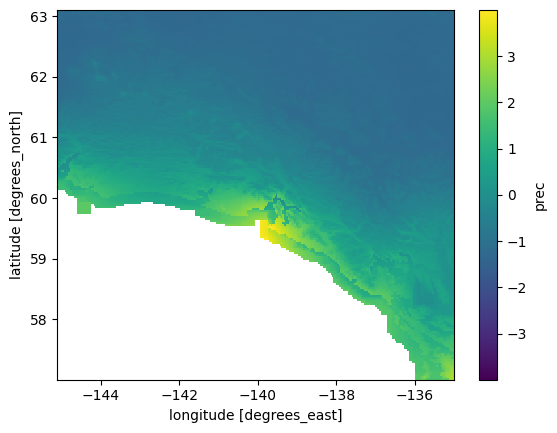

In [11]:
x.prec.plot(cmap='viridis')

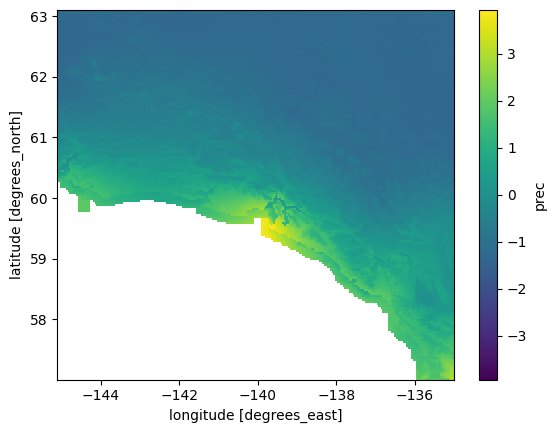

In [12]:
y.prec.plot(cmap='viridis')

In [13]:
z=x-y

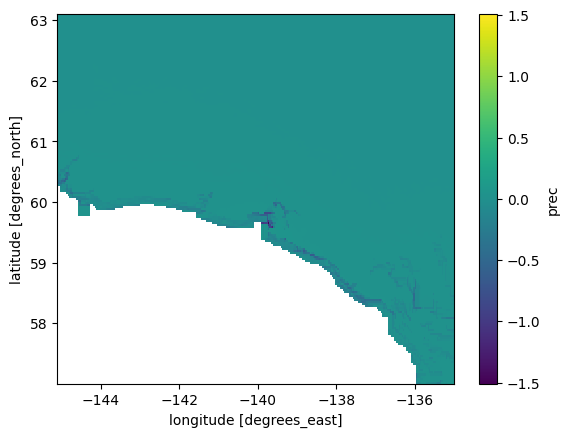

In [15]:
z.prec.plot(cmap='viridis')

In [2]:
prism = torch.load('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_shift16_64_prism_agg3/prism_train.pt')
wrf = torch.load('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_shift16_64_prism_agg3/worldclim_train.pt')
hr = torch.load('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_shift16_64_prism_agg3/HR_covariates_train.pt')

In [3]:
wrf.shape

torch.Size([9943, 2, 32, 32])

In [4]:
hr.shape

torch.Size([9943, 4, 128, 128])

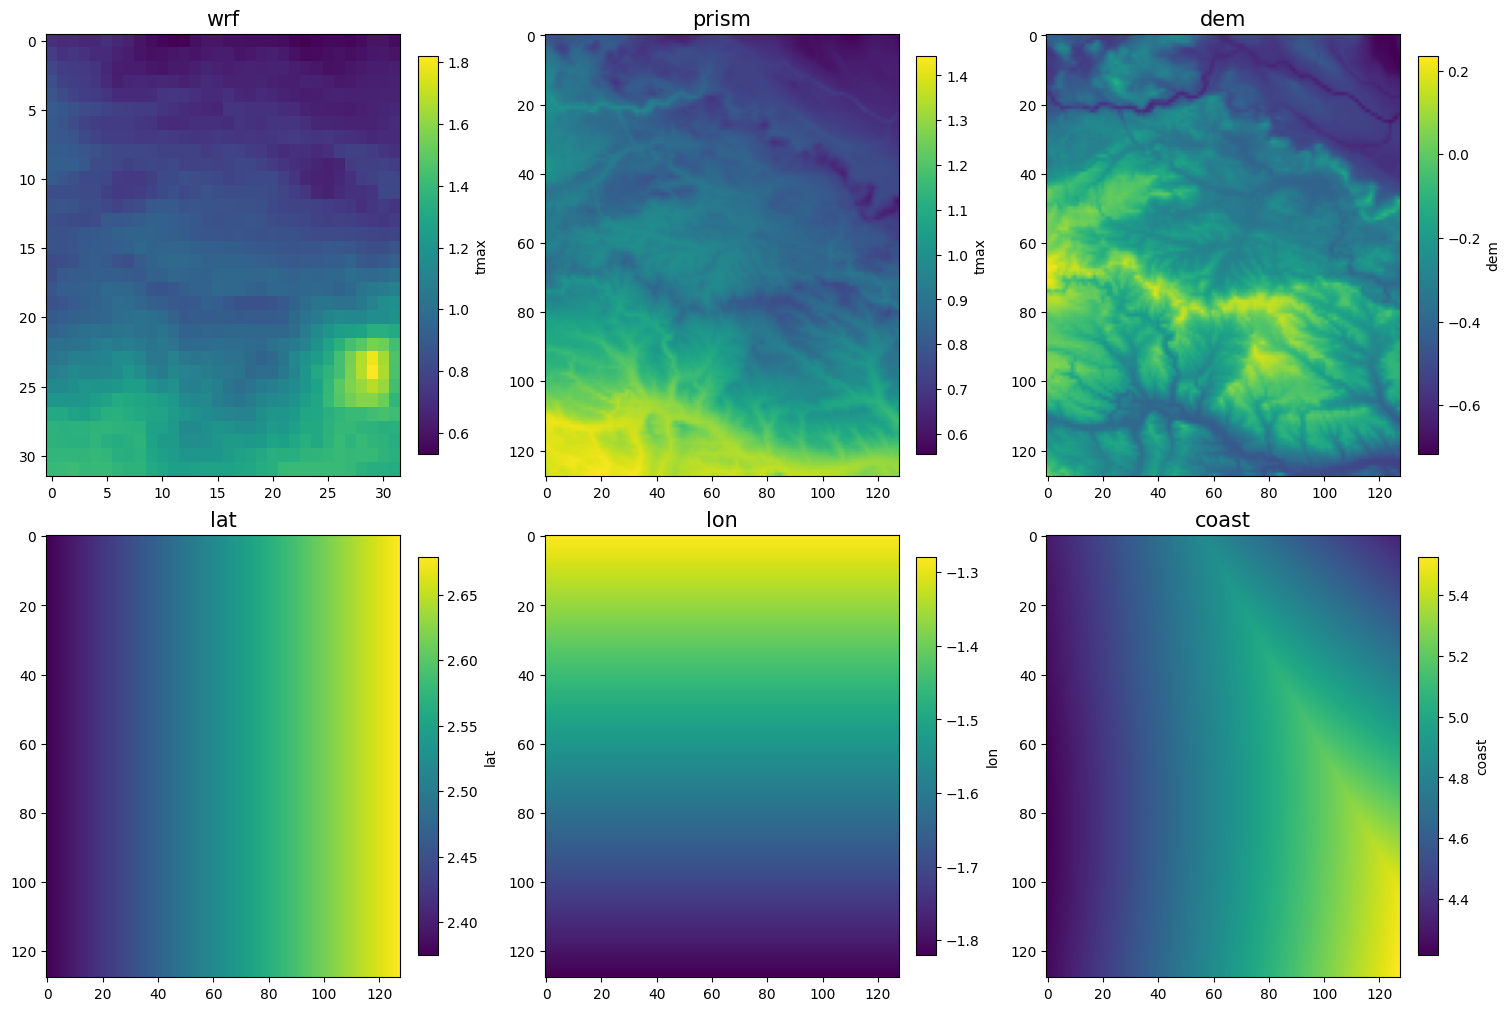

In [6]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), layout='constrained')
# fig.tight_layout(h_pad=2)

ax[0,0].set_title('wrf', fontsize=15)
ax[0,1].set_title(r'prism', fontsize=15)
ax[0,2].set_title(r'dem', fontsize=15)
ax[1,0].set_title(r'lat', fontsize=15)
ax[1,1].set_title(r'lon', fontsize=15)
ax[1,2].set_title(r'coast', fontsize=15)

minmin =  0 # np.min([torch.min(dat_hs_small_test)])

minw =  0 # np.min([torch.min(dat_uas_greenland_test_small)])

i = -1

c = 'viridis'

im1 = ax[0,0].imshow(wrf[i, 0, ...].detach().cpu(), aspect='auto', cmap=c)

im2 = ax[0,1].imshow(prism[i, 0, ...].detach().cpu(), aspect='auto', cmap=c)

im3 = ax[0,2].imshow(hr[i, 0,...].detach().cpu(), aspect='auto', cmap=c)

im4 = ax[1,0].imshow(hr[i, 1,...].detach().cpu(), aspect='auto', cmap=c)

im5 = ax[1,1].imshow(hr[i, 2,...].detach().cpu(), aspect='auto', cmap=c)

im6 = ax[1,2].imshow(hr[i, 3,...].detach().cpu(), aspect='auto', cmap=c)

cbar1 = fig.colorbar(im1, ax=ax[0,0], orientation='vertical', shrink=0.9, location='right', aspect=20, label='tmax')
cbar2 = fig.colorbar(im2, ax=ax[0,1], orientation='vertical', shrink=0.9, location='right', aspect=20, label='tmax')
cbar3 = fig.colorbar(im3, ax=ax[0,2], orientation='vertical', shrink=0.9, location='right', aspect=20, label='dem')

cbar4 = fig.colorbar(im4, ax=ax[1,0], orientation='vertical', shrink=0.9, location='right', aspect=20, label='lat')
cbar5 = fig.colorbar(im5, ax=ax[1,1], orientation='vertical', shrink=0.9, location='right', aspect=20, label='lon')
cbar6 = fig.colorbar(im6, ax=ax[1,2], orientation='vertical', shrink=0.9, location='right', aspect=20, label='coast')

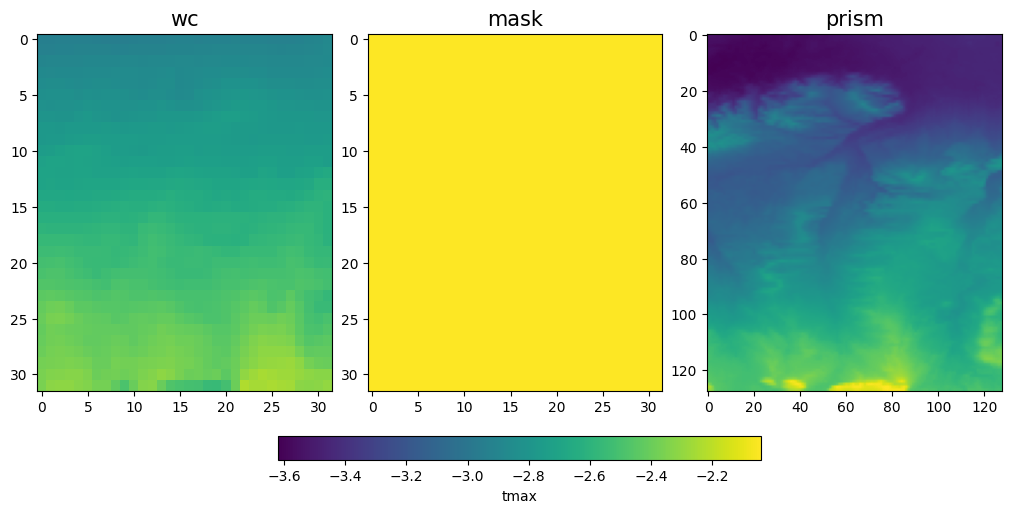

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5), layout='constrained')
# fig.tight_layout(h_pad=2)

ax[0].set_title('wc', fontsize=15)
ax[1].set_title(r'mask', fontsize=15)
ax[2].set_title(r'prism', fontsize=15)

i = 291+(2*145)

min =  torch.min(prism[i, 0,...])

max =  torch.max(prism[i, 0,...])

c = 'viridis'

im1 = ax[0].imshow(wrf[i, 0, ...].detach().cpu(), aspect='auto', vmin=min, vmax=max, cmap=c)

im2 = ax[1].imshow(wrf[i, 1, ...].detach().cpu(), aspect='auto', vmin=min, vmax=max, cmap=c)

im3 = ax[2].imshow(prism[i, 0,...].detach().cpu(), aspect='auto', vmin=min, vmax=max, cmap=c)

cbar1 = fig.colorbar(im1, ax=ax[0:3], orientation='horizontal', shrink=0.5, location='bottom', aspect=20, label='tmax')

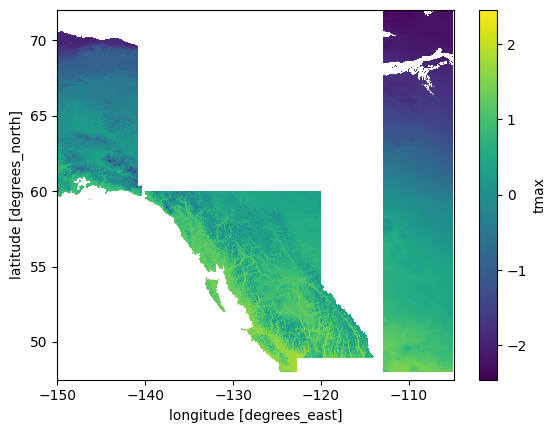

In [7]:
x = xr.open_dataset('C:/Users/SBEALE/Desktop/GAN Data/tmax/worldclim/full_domain_shift16_64_prism_agg3/prism_train.nc')
x.tmax.plot(cmap='viridis')

In [33]:
wrf.shape

torch.Size([39701, 2, 32, 32])

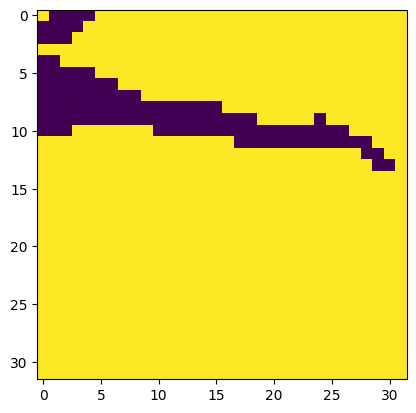

In [11]:
plt.imshow(wrf[140,1,...])

In [45]:
wrf[1]

tensor([[[ 0.4500,  0.3712,  0.3095,  ..., -0.0460,  0.0024,  0.0108],
         [ 0.5717,  0.6716,  0.8052,  ...,  0.1341,  0.1748,  0.1955],
         [ 0.4878,  0.6793,  0.8954,  ..., -0.4392, -0.3420, -0.1816],
         ...,
         [-1.7068, -1.5016, -1.2592,  ...,  0.1311,  0.0896,  0.1489],
         [-1.5702, -1.3470, -0.9928,  ...,  0.6562,  0.6596,  0.6573],
         [-1.0583, -0.6812, -0.2568,  ...,  0.9816,  0.9644,  0.9159]]])

In [42]:
x = torch.stack((wrf[0:29]), dim=0)

TypeError: stack(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor

In [29]:
x.shape

torch.Size([4, 29, 58])

In [33]:
hr[0,0,...].shape

torch.Size([128, 128])

In [31]:
for i in range(0, 58):
    for j in range(0, 29):
        x[0,j,i] = hr[i+j,0,...]
        x[1,j,i] = hr[i+j,1,...]
        x[2,j,i] = hr[i+j,2,...]
        x[3,j,i] = hr[i+j,3,...]

RuntimeError: expand(torch.FloatTensor{[128, 128]}, size=[]): the number of sizes provided (0) must be greater or equal to the number of dimensions in the tensor (2)

In [23]:
torch.cat()

In [26]:
len(dem)

1682

In [81]:
dem = torch.from_numpy(np.array(dem))

In [82]:
dem.shape

torch.Size([270, 128, 128])

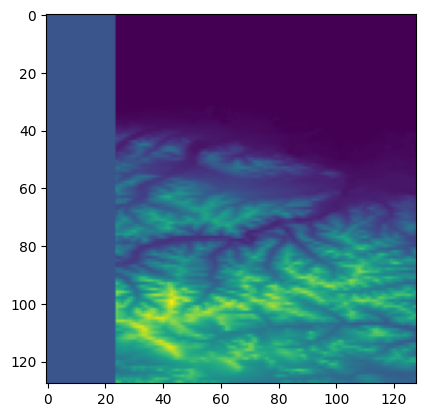

In [83]:
plt.imshow(dem[1,...])

In [5]:
globals()['hello'] = 2

In [6]:
hello

2